<a href="https://colab.research.google.com/github/nurulaimanabdr/kmeansclustering-latest/blob/kmeans_pest_detection/kmeans_13_feb_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
#style.use('ggplot')
import os
import cv2
import csv
import sklearn
import pandas as pd
import sklearn.metrics as sm
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive')

In [ ]:
train_dir="Colaboratory/train/aphid/aphid_70"
test_dir="Colaboratory/test/aphid/aphid_70"
without_dir ="Colaboratory/without segment"

In [ ]:
 path = os.path.join(without_dir)  

In [ ]:
for img in tqdm(os.listdir(path)):  # iterate over each image whitefly
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

100%|██████████| 3/3 [00:00<00:00,  4.73it/s]


In [ ]:
#IMG_SIZE = 50
#for img in os.listdir(path):  # iterate over each image whitefly
    #img_array = cv2.imread(os.path.join(path,img), cv2.COLOR_BGR2RGB)  # convert to array
    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    #plt.imshow(img_array)  # graph it
    #plt.show()  # display!
    #break
#break

In [ ]:
print(img_array)

[[[ 62 115 102]
  [ 64 117 104]
  [ 65 118 105]
  ...
  [ 49  75  69]
  [ 63  89  83]
  [ 66  92  86]]

 [[ 58 111  98]
  [ 61 114 101]
  [ 63 116 103]
  ...
  [ 54  80  74]
  [ 59  85  79]
  [ 54  80  74]]

 [[ 62 115 102]
  [ 64 117 104]
  [ 67 120 107]
  ...
  [ 53  76  71]
  [ 55  78  73]
  [ 46  69  64]]

 ...

 [[ 77 122 113]
  [ 77 122 113]
  [ 77 122 113]
  ...
  [  1   3   3]
  [  2   7   6]
  [ 36  41  40]]

 [[ 78 123 114]
  [ 75 120 111]
  [ 73 118 109]
  ...
  [  5   7   7]
  [ 10  15  14]
  [ 48  53  52]]

 [[ 73 118 109]
  [ 67 112 103]
  [ 64 109 100]
  ...
  [ 52  54  54]
  [ 61  66  65]
  [102 107 106]]]


In [ ]:
print(img_array.shape)

(264, 384, 3)


In [ ]:
A=img_array/255

In [ ]:
ish=A.shape
X=np.zeros((ish[0]*ish[1],4),np.float32)
temp_1=np.zeros((ish[0],ish[1]),np.float32)
for i in range(0,ish[0],1):
    for j in range(0,ish[1],1):
        temp_1[i,j]=(i+j)/450

In [ ]:
temp_1=np.reshape(temp_1,(ish[0]*ish[1]))        
A_new=np.reshape(A,(ish[0]*ish[1],ish[2]))

In [ ]:
#IMG_SIZE = 50
#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [ ]:
X[:,0:3]=A_new
X[:,3]=temp_1

In [ ]:
X_1=np.float32(X)
criteria = (cv2.TERM_CRITERIA_MAX_ITER, 60, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
ret,labels,centers = cv2.kmeans(X_1,2,None,criteria,60,flags)

In [ ]:
centers=np.uint8(centers*255)

In [ ]:
centers=centers[:,0:3]
res = centers[labels.flatten()]
res2 = np.reshape(res,(ish[0],ish[1],ish[2]))
#plt.imshow(res2)

In [ ]:
print(res2.shape)

(264, 384, 3)


In [ ]:
res2 = np.float32(res2)

In [ ]:
res2

array([[[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 138., 123.],
        ...,
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.]],

       [[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 138., 123.],
        ...,
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.]],

       [[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 138., 123.],
        ...,
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.]],

       ...,

       [[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 138., 123.],
        ...,
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.]],

       [[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 138., 123.],
        ...,
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.],
        [ 33.,  47.,  45.]],

       [[ 83., 138., 123.],
        [ 83., 138., 123.],
        [ 83., 1

In [ ]:
print(centers)

[[ 83 138 123]
 [ 33  47  45]]


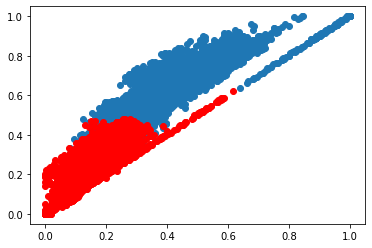

In [ ]:
A = X_1[labels.ravel()==0]
B = X_1[labels.ravel()==1]
C = X_1[labels.ravel()==2]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g',label = 'cluster 3')
#plt.scatter(centers[:,0],centers[:,1],s = 50,c = 'y', marker = 's')
#plt.xlabel(''),plt.ylabel('')
plt.show()

In [ ]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # TO-DO: Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    # TO-DO: Try out different threshold values to see what works best!
    threshold = 128
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "whitefly"
        predicted_label = 1
    # else, the predicted_label can stay 0 (it is predicted to be "whitefly")
    
    return predicted_label    

In [ ]:
km = KMeans(n_clusters = 2)
clusters=km.fit_predict(centers)

In [ ]:
km.labels_

In [ ]:
data = np.array ([[86, 173], [13, 105]]) 

In [ ]:
plt.title('Centroid value with n_clusters = 2', loc='center', fontsize=12)
plt.scatter(*zip(*data), marker = 'o', color = 'green')
plt.xlabel('Pixels')
plt.ylabel('RGB values (1D-array)')